<a href="https://colab.research.google.com/github/DakshSharma755/plagiarism_check-slm-/blob/main/plagiarism_checker(slm).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ruvelpereira/mit-plagairism-detection-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mit-plagairism-detection-dataset


In [35]:
import pandas as pd

file_path = '/kaggle/input/mit-plagairism-detection-dataset/train_snli.txt'

# Load the dataset
data = []

with open(file_path, 'r', encoding='utf-8') as f:
    for line in f:
        parts = line.strip().split('\t')
        if len(parts) == 3:
            s1, s2, label = parts
            combined_text = s1 + " " + s2
            data.append({'text': combined_text, 'label': int(label)})

df = pd.DataFrame(data)
print(df.head())


                                                text  label
0  A person on a horse jumps over a broken down a...      0
1  A person on a horse jumps over a broken down a...      1
2  Children smiling and waving at camera There ar...      1
3  Children smiling and waving at camera The kids...      0
4  A boy is jumping on skateboard in the middle o...      0


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.2, stratify=df['label'], random_state=42
)

vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [24]:
from tensorflow.keras import Input, Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Input(shape=(X_train_vec.shape[1],)),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 256)            │     2,560,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,593,281 (9.89 MB)

 Trainable params: 2,593,281 (9.89 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history = model.fit(
    X_train_vec.toarray(), y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=32
)

Epoch 1/10
8266/8266 ━━━━━━━━━━━━━━━━━━━━ 546s 66ms/step - accuracy: 0.6303 - loss: 0.6293 - val_accuracy: 0.6953 - val_loss: 0.5663
Epoch 2/10
8266/8266 ━━━━━━━━━━━━━━━━━━━━ 538s 65ms/step - accuracy: 0.7364 - loss: 0.5184 - val_accuracy: 0.7103 - val_loss: 0.5485
Epoch 3/10
8266/8266 ━━━━━━━━━━━━━━━━━━━━ 539s 65ms/step - accuracy: 0.7892 - loss: 0.4393 - val_accuracy: 0.7121 - val_loss: 0.5508
Epoch 4/10
8266/8266 ━━━━━━━━━━━━━━━━━━━━ 538s 65ms/step - accuracy: 0.8277 - loss: 0.3759 - val_accuracy: 0.7067 - val_loss: 0.5940
Epoch 5/10
8266/8266 ━━━━━━━━━━━━━━━━━━━━ 537s 65ms/step - accuracy: 0.8542 - loss: 0.3261 - val_accuracy: 0.7017 - val_loss: 0.6320
Epoch 6/10
8266/8266 ━━━━━━━━━━━━━━━━━━━━ 538s 65ms/step - accuracy: 0.8780 - loss: 0.2808 - val_accuracy: 0.6929 - val_loss: 0.7043
Epoch 7/10
8266/8266 ━━━━━━━━━━━━━━━━━━━━ 539s 65ms/step - accuracy: 0.8950 - loss: 0.2449 - val_accuracy: 0.6865 - val_loss: 0.7466
Epoch 8/10
8266/8266 ━━━━━━━━━━━━━━━━━━━━ 538s 65ms/step - accuracy: 

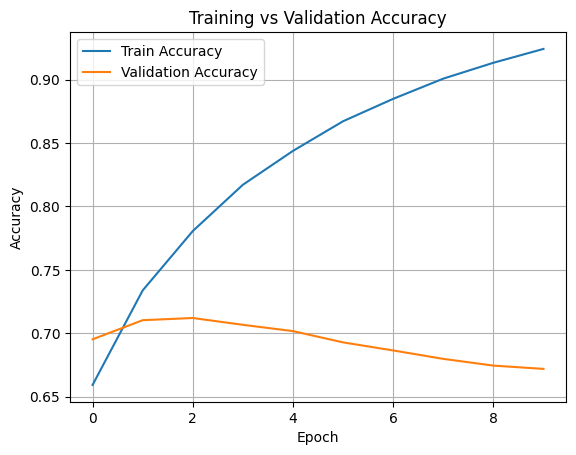

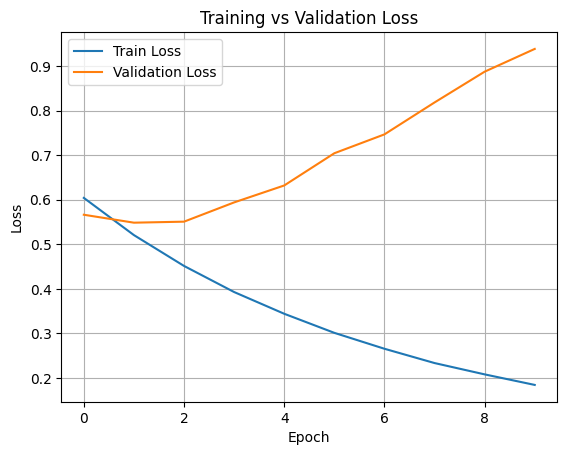

In [29]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [30]:
def quantify_accuracy(history, model=None, X_test=None, y_test=None):
    results = {}

    # Final training & validation accuracy from history
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    results['Final Training Accuracy'] = train_acc
    results['Final Validation Accuracy'] = val_acc

    # Generalization Gap
    results['Generalization Gap'] = train_acc - val_acc

    # Optional: test accuracy
    if model and X_test is not None and y_test is not None:
        test_loss, test_acc = model.evaluate(X_test.toarray(), y_test, verbose=0)
        results['Test Accuracy'] = test_acc

    # Print neatly
    print("=== Net Accuracy Summary ===")
    for k, v in results.items():
        print(f"{k}: {v * 100:.2f}%")

    return results


In [31]:
quantify_accuracy(history, model=model, X_test=X_test_vec, y_test=y_test)


=== Net Accuracy Summary ===
Final Training Accuracy: 92.42%
Final Validation Accuracy: 67.20%
Generalization Gap: 25.22%
Test Accuracy: 67.52%


{'Final Training Accuracy': 0.9242064356803894,
 'Final Validation Accuracy': 0.6719632744789124,
 'Generalization Gap': 0.25224316120147705,
 'Test Accuracy': 0.6751683950424194}

In [27]:
def predict_plagiarism(s1, s2):
    combined = s1 + " " + s2
    vec = vectorizer.transform([combined])
    pred = model.predict(vec.toarray())[0][0]
    return f"Plagiarism Probability: {pred:.2f}"


In [33]:
s1 = "A child is smiling at the camera"
s2 = "A kid is happily looking into the lens"
print(predict_plagiarism(s1, s2))

s1 = "A boy rides a skateboard"
s2 = "The government passed a new law"
print(predict_plagiarism(s1, s2))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Plagiarism Probability: 0.89
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Plagiarism Probability: 0.76
